# Machine learning mini-course
**Santiago Hincapie-Potes**

# [Course overview](https://github.com/shpotes/ML-biocomp)

## What Is Machine Learning?

Machine Learning is the science of programming computers so they can *learn from data*

Here is a slightly more general definition:
> [Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed. —Arthur Samuel, 1959

And a more engineering-oriented one:
> A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience E. —Tom Mitchell, 1997

Your spam filter is a Machine Learning program that can learn to flag spam given examples of spam emails (e.g., flagged by users) and examples of regular (nonspam, also called “ham”) emails.

The examples that the system uses to learn are
called the training set.<br>
Each training example is called a training instance (or sample).

In this case, the task $T$ is to flag spam for new emails, the experience $E$ is the training
data, and the performance measure $P$ needs to be defined; for example, you can use
the ratio of correctly classified emails.

## Why use Machine Learning?
How you would write a spam filter using traditional programming techniques?

1. First you would look at what spam typically looks like. You might notice that some senders (such as "ResearchGate", "Universidad EAFIT on Yammer", "Información Institucional", "Idiomas EAFIT") tend to send a lot of spam. Perhaps you would also notice a few other patterns in the subject, the email's body, and so on.

2. You would write detection algorithm for each patterns that you noticed

Since the problem isn't trivial, you program will likely become a long list of complex rules--prety hard to maintain 

* Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
* Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
* Fluctuating environments: a Machine Learning system can adapt to new data.
* Getting insights about complex problems and large amounts of data.

## Types of Machine Learning Systems

### Supervised learning
In supervised learning, the training data you feed to the algorithm includes the desired
solutions, called labels

A typical supervised learning task is classification.The spam filter is a good example
of this: it is trained with many example emails along with their class (spam or ham),
and it must learn how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car,
given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is
called regression

### Unsupervised learning
In unsupervised learning, as you might guess, the training data is unlabeled. The system tries to learn without a teacher.

### Semisupervised learning
Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called semisupervised learning

### Reinforcement Learning
Reinforcement Learning is a very different beast. The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return

# Instance-based learning

**Ideal case**: We know the distributions from which the data comes. $\Rightarrow$ we can analytically calculate our model.

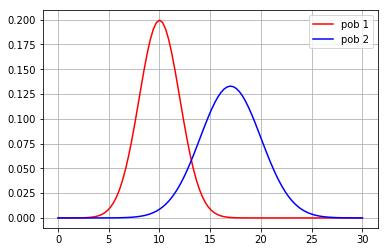

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pob 1")
plt.plot(x, d2.pdf(x), color="blue", label="pob 2")
plt.grid()
plt.legend();

optimal boundary 13.15


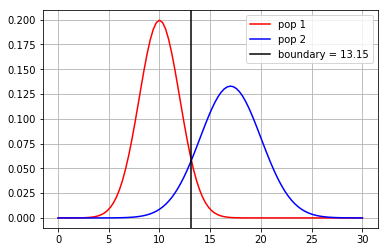

In [2]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print("optimal boundary %.2f" % minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"boundary = %.2f"%minx)
plt.grid()
plt.legend();

In [3]:
print('pob 1 error', 1-d1.cdf(minx))
print('pob 2 error', d2.cdf(minx))

pob 1 error 0.05773516274534907
pob 2 error 0.09957961739117976


**Real case** We only have sampling data<br>
$\rightarrow$ How do we determine where to put the border?<br>
$\rightarrow$ What kind of bound would we obtain?

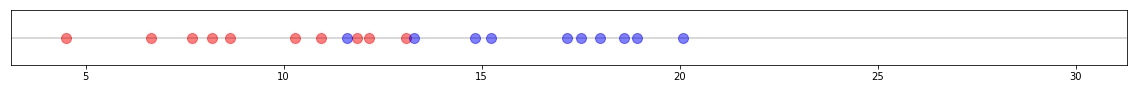

In [4]:
from Utils.lect1 import show_1D_dataset_samples
show_1D_dataset_samples(10, d1, d2, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

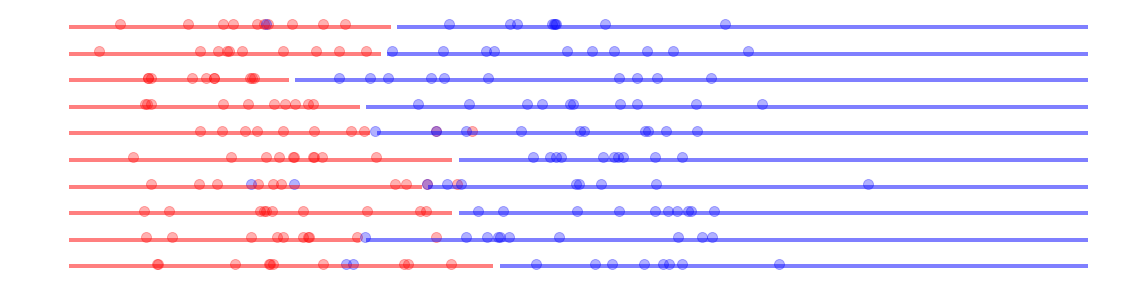

In [5]:
show_1D_dataset_samples(10, d1, d2, dot_alpha=.3)

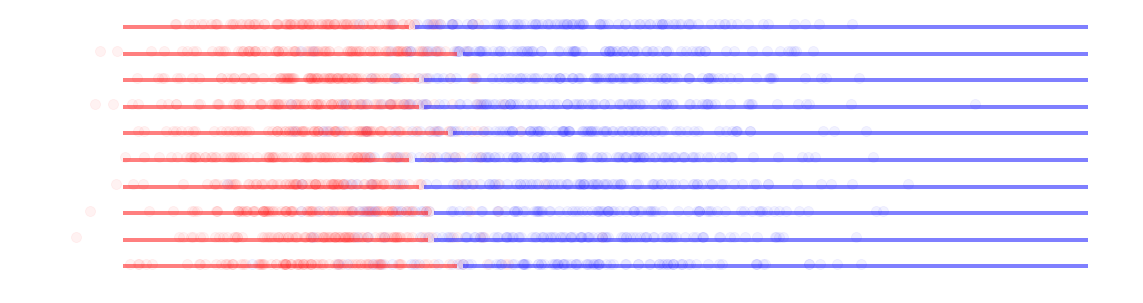

In [6]:
show_1D_dataset_samples(100, d1, d2, dot_alpha=.05)

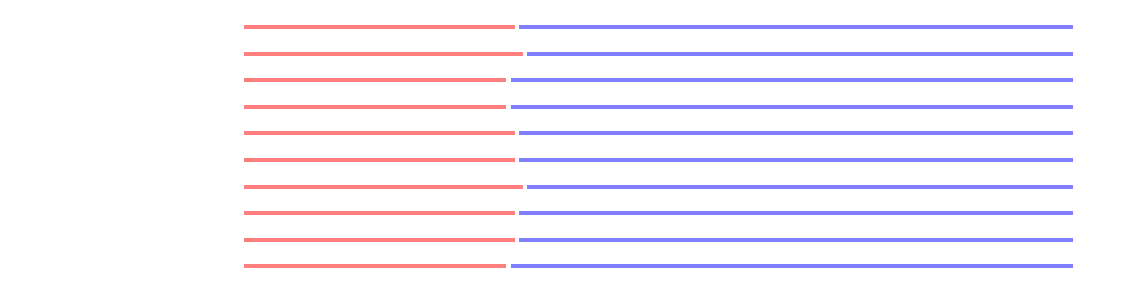

In [7]:
show_1D_dataset_samples(10000, d1, d2, dot_alpha=.001)

# 2D case
* A classification model is a **region** in the plane

* What is the region that produces the least error?

In [8]:
import Utils.mlutils as mlutils 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

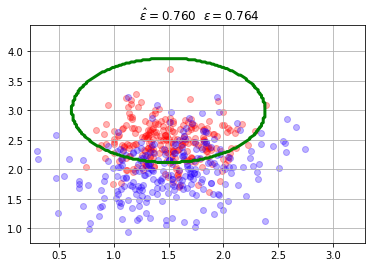

In [9]:
# Ideal case
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0,.2]])
X,y = mc.sample(500)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();

In general we **only have one sample**, since we have no knowledge of the data distribution

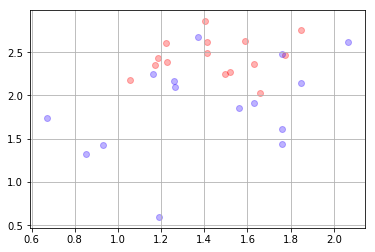

In [10]:
X,y = mc.sample(30)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
plt.grid()

* The machine learning classification algorithms **compute boundaries** between the data
* Instance based over model based

**we are blind**

Thus, any algorithm need some assumptions over the data

* The goal of a ML user is to get as close as possible to the ** Bayesian border ** (which we do not know how it is).

* Different ML algorithms have ** different capabilities ** to model borders.

* No free lunch theorem

* We need two things: 
    + a great algorithm
    + a method to meassure the goodness of fit

4it [00:14,  3.95s/it]


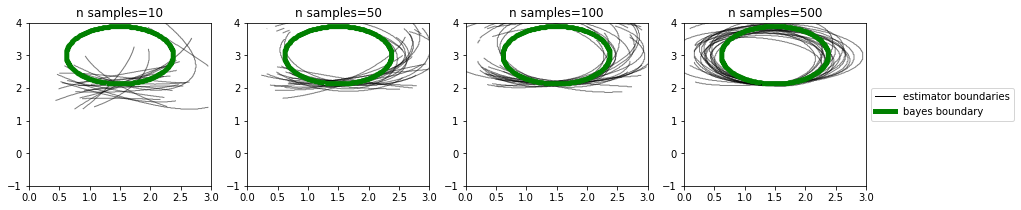

In [11]:
# Stability

estimator = SVC(gamma=.5)
mlutils.sample_borders(mc, estimator, samples = [10,50,100,500], n_reps=20, mins=[0,-1], maxs=[3,4])

## Only one data set
how well the model will generalize to new cases?

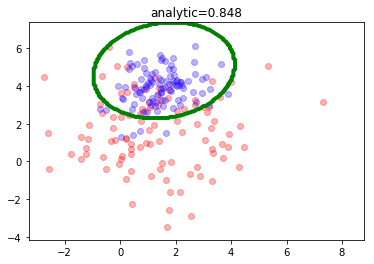

In [12]:
dataset_size = 200
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 1.5], cov0=[[4., 0.5], [0.1, 4.]],
                                        mean1=[1.5,4.], cov1=[[1,0.5],[0.1,1.]])
X,y = mc.sample(dataset_size)
mlutils.plot_estimator_border(mc, n_samples=dataset_size, legend=False)
analitic_score = mc.analytic_score()

# Training/Test set 
plit your data into two sets: the training set and the test set. As
these names imply, you train your model using the training set, and you test it using
the test set.

In [13]:
test_pct = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 2) (140,)
(60, 2) (60,)


Text(0.5, 1.0, 'test data')

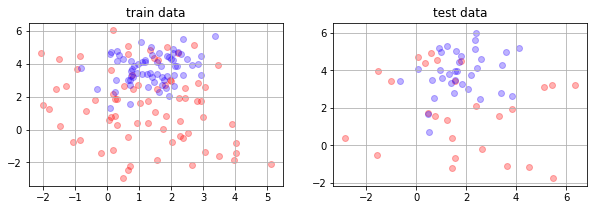

In [14]:
plt.figure(figsize=(10,3))
plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
plt.title("train data")
plt.grid()
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
plt.grid()
plt.title("test data")

In [15]:
#estimator = SVC(gamma=1)
estimator = SVC(gamma=100)
#estimator = LogisticRegression()
#estimator = RandomForestClassifier()
#estimator = DecisionTreeClassifier(max_depth=3)
estimator.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_pct)
estimator.fit(X_train, y_train)
trsc = estimator.score(X_train, y_train)
tssc = estimator.score(X_test, y_test)
print("train_score %5.2f" % estimator.score(X_train, y_train))
print("test_score  %5.2f" % estimator.score(X_test, y_test))

train_score  0.99
test_score   0.57


(0.832475, 0.167525)

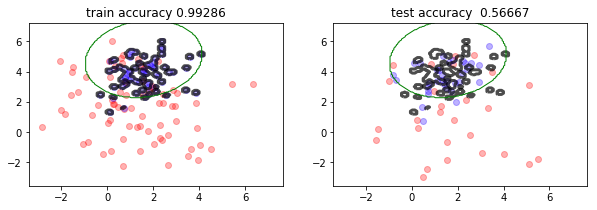

In [16]:
plt.figure(figsize=(10,3)); plt.subplot(121)
mlutils.plot_2Ddata(X_train, y_train, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0), line_width=3, line_alpha=.7, label=None)
plt.title("train accuracy %.5f"%estimator.score(X_train, y_train))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0), line_width=1, line_alpha=1., line_color="green", label="bayes boundary")
plt.subplot(122)
mlutils.plot_2Ddata(X_test, y_test, dots_alpha=.3)
mlutils.plot_2D_boundary(estimator.predict, np.min(X, axis=0), np.max(X, axis=0), line_width=3, line_alpha=.7, label=None)
plt.title("test accuracy  %.5f"%estimator.score(X_test, y_test))
mlutils.plot_2D_boundary(mc.predict, np.min(X, axis=0), np.max(X, axis=0),line_width=1, line_alpha=1., line_color="green", label="bayes boundary")

# Multidimensional case (>2D)
Usually we have dataset with a lot of dimensions (features) and we cant visualize the data like in 2D<br>
How can we know if we have a small dataset?<br>
How can we know if we have overfit? 

## Learning curve!

100%|██████████| 9/9 [00:00<00:00, 28.48it/s]


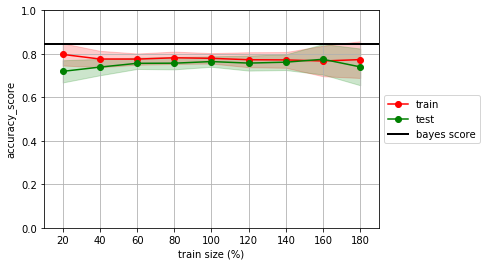

In [17]:
estimator = LogisticRegression()
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

100%|██████████| 9/9 [00:00<00:00, 17.44it/s]


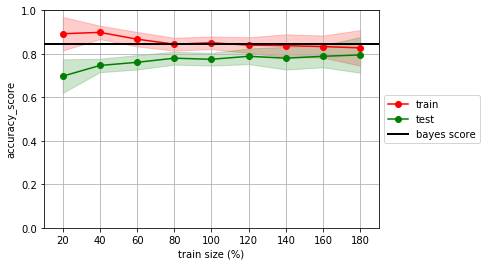

In [18]:
estimator = SVC(gamma=1)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

100%|██████████| 9/9 [00:00<00:00, 14.36it/s]


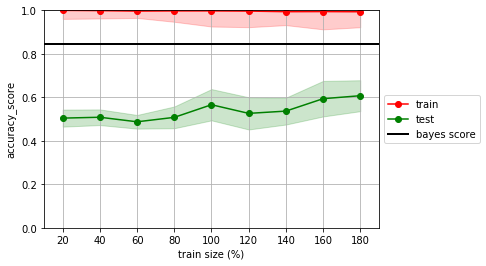

In [19]:
estimator = SVC(gamma=100)
mlutils.lcurve(estimator, X, y, n_reps=20, score_func=accuracy_score)
plt.axhline(analitic_score, lw=2, color="black", label="bayes score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))